<a href="https://colab.research.google.com/github/anastasiiansm/AImusic/blob/main/1_1_0_def_basic_statistics_WASABI_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import re
import glob
from collections import defaultdict
import json
import pandas as pd
import seaborn as sns


from tqdm.notebook import tqdm
tqdm.pandas()

In [53]:
def update_defaultdict(def_dict, dictionary):

    for key, val in dictionary.items():
        def_dict[key] += val

    return def_dict

In [54]:
data_file_path = 'data.csv'
data = pd.read_csv(data_file_path)

In [55]:
song_lyrics = []

In [80]:
relevant_columns = ['Title Lyrics', 'artist_type', 'Artist Name', 'Text Lyrics', 'Language ', 'Year', 'Tags', 'gender_msd_musicnn Original']

if not all(col in data.columns for col in relevant_columns):
    raise ValueError("Some of the relevant columns are missing from the dataset.")

In [57]:
import pandas as pd

# Load your data from the CSV file
data_file_path = '/content/data.csv'  # Ensure this is the correct path in your Google Colab environment
data = pd.read_csv(data_file_path)

# Check for the required columns
if 'artist_type' not in data.columns or 'Year' not in data.columns:
    raise ValueError("The columns 'artist_type' and 'Year' are required.")

# Group by 'song_year_combined' and 'artist_type' to count the occurrences
artist_type_year_counts = data.groupby(['Year', 'artist_type']).size().unstack(fill_value=0)

# Reset the index to have a cleaner DataFrame
artist_type_year_counts = artist_type_year_counts.reset_index()

# Rename the year column for clarity
artist_type_year_counts.columns.name = None  # Remove the name for cleaner display
artist_type_year_counts = artist_type_year_counts.rename(columns={'Year': 'year'})

# Display the results
print(artist_type_year_counts)


   year  band  feat  others  person
0  2019    10    36       1      53
1  2020     6    44       0      50
2  2021     6    39       0      55
3  2022     3    33       0      64
4  2023     2    33       0      65


In [64]:
# total number of songs
artist_type_year_counts.sum()

,0
band,27
feat,185
others,1
person,287


   Year  band  feat  others  person
0  2019    10    36       1      53
1  2020     6    44       0      50
2  2021     6    39       0      55
3  2022     3    33       0      64
4  2023     2    33       0      65
Index(['Year', 'band', 'feat', 'others', 'person'], dtype='object')


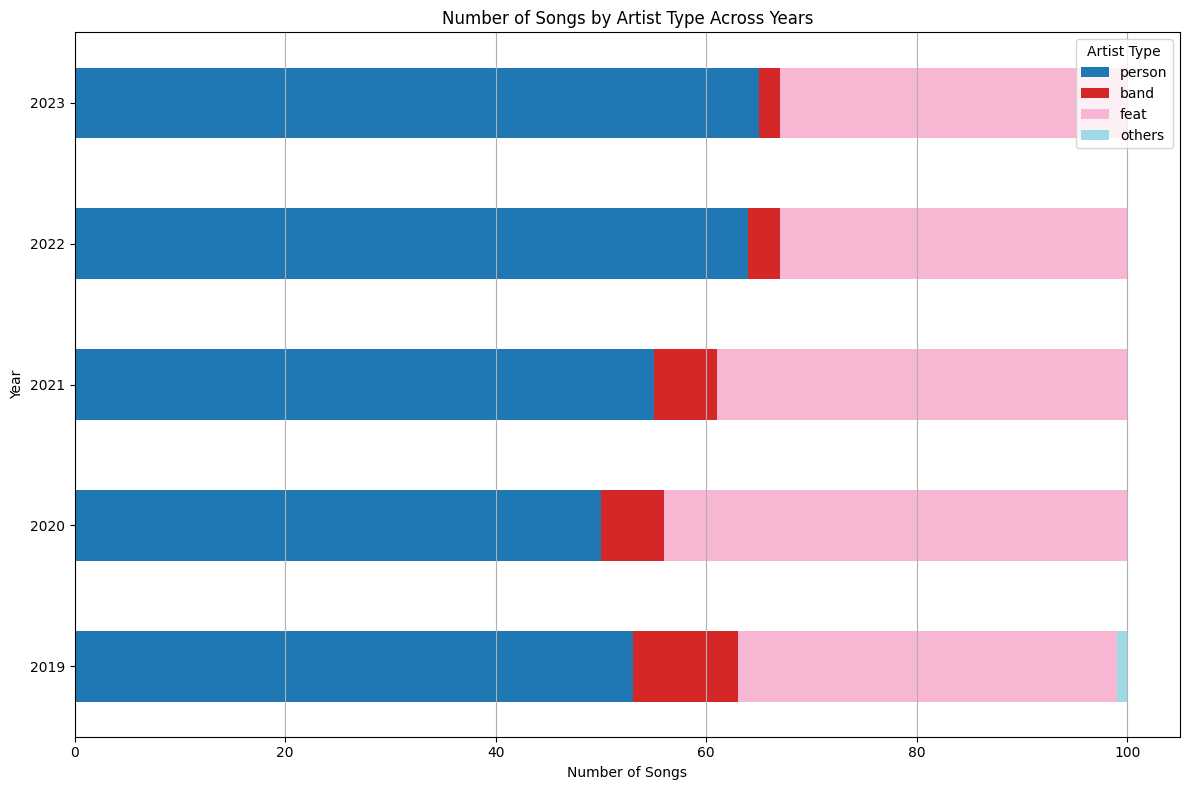

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the CSV file
data_file_path = 'data.csv'  # Adjust the path as necessary
data = pd.read_csv(data_file_path)

# Check for the required columns
if 'artist_type' not in data.columns or 'Year' not in data.columns:
    raise ValueError("The columns 'artist_type' and 'Year' are required.")

# Group by 'Year' and 'artist_type' to count the occurrences
artist_type_year_counts = data.groupby(['Year', 'artist_type']).size().unstack(fill_value=0)

# Reset the index to have a cleaner DataFrame
artist_type_year_counts = artist_type_year_counts.reset_index()

# Rename the year column for clarity (if needed)
artist_type_year_counts.columns.name = None  # Remove the name for cleaner display

# Check the structure of the DataFrame
print(artist_type_year_counts.head())
print(artist_type_year_counts.columns)  # This will help you verify the column names

# Set the index to the Year for easy plotting
artist_type_year_counts.set_index('Year', inplace=True)

# Create a new DataFrame for plotting with the years as the index
# Adjust this line to include the specific artist types you have
data_to_plot = artist_type_year_counts[['person', 'band', 'feat', 'others']]  # Ensure these columns exist in your DataFrame

# Plotting
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
data_to_plot.plot(kind='barh', stacked=True, ax=plt.gca(), colormap='tab20')

plt.xlabel("Number of Songs")
plt.title("Number of Songs by Artist Type Across Years")
plt.legend(title="Artist Type")
plt.grid(axis='x')  # Grid only on the x-axis for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


artist_gender  Year artist_type  Female  Male
0              2019        band       9     1
1              2019        feat      25    11
2              2019      others       1     0
3              2019      person      29    24
4              2020        band       3     3
5              2020        feat      24    20
6              2020      person      27    23
7              2021        band       6     0
8              2021        feat      24    15
9              2021      person      37    18
10             2022        band       2     1
11             2022        feat      26     7
12             2022      person      40    24
13             2023        band       2     0
14             2023        feat      21    12
15             2023      person      36    29


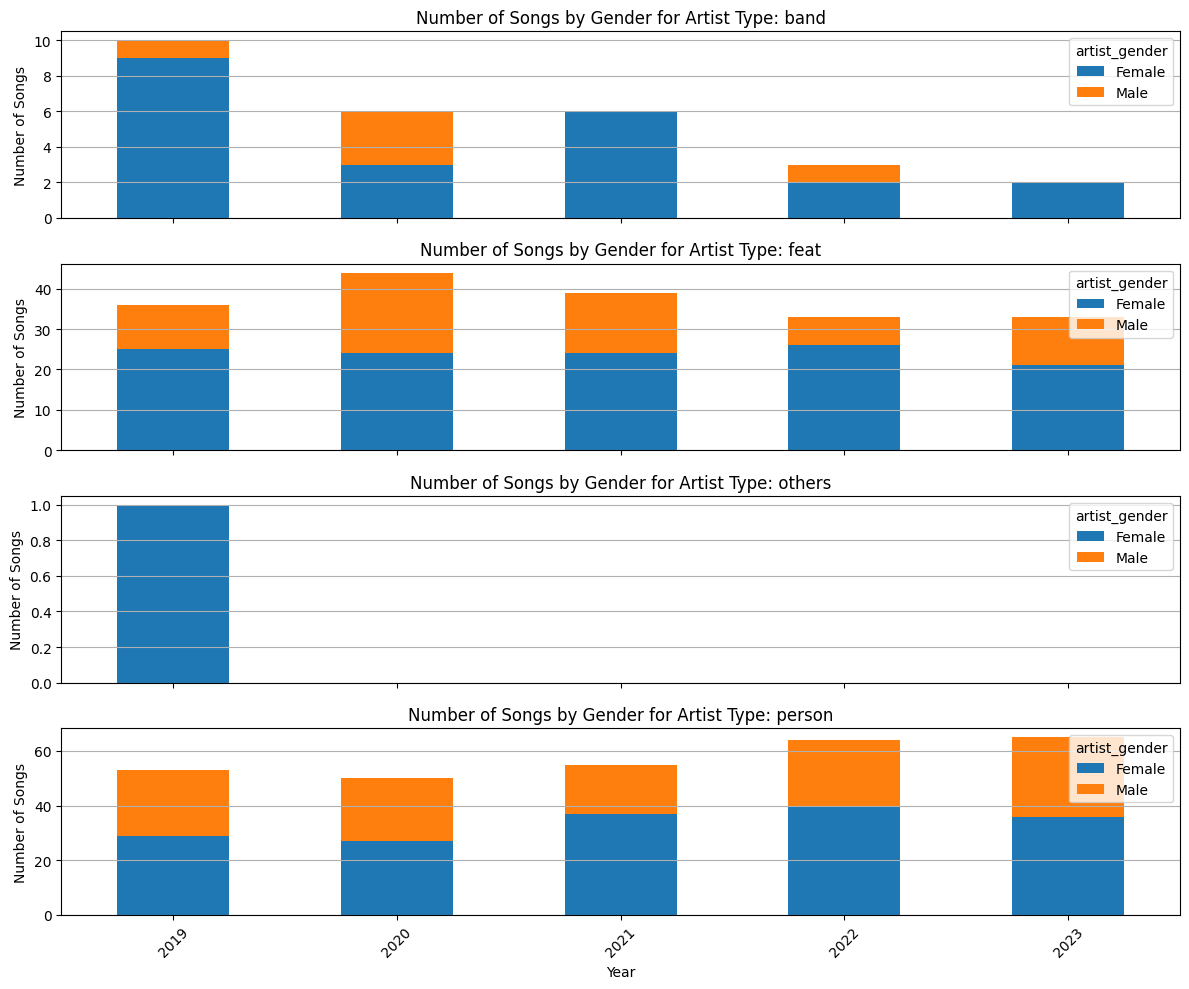

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the CSV file
data_file_path = '/content/data.csv'  # Path to your CSV file
song_lyrics = pd.read_csv(data_file_path)

# Check if the required columns exist
required_columns = ['Year', 'artist_type', 'gender_msd_musicnn Original']
for column in required_columns:
    if column not in song_lyrics.columns:
        raise ValueError(f"The column '{column}' is required.")

# Create the artist_gender column based on the gender_msd_musicnn Original column
song_lyrics['artist_gender'] = song_lyrics['gender_msd_musicnn Original'].apply(lambda x: 'Male' if x >= 0.5 else 'Female')

# Group by Year, artist_type, and artist_gender, and count the number of occurrences
type_gender_counts = song_lyrics.groupby(['Year', 'artist_type', 'artist_gender']).size().unstack(fill_value=0)

# Display the result as a DataFrame
type_gender_counts = type_gender_counts.reset_index()
print(type_gender_counts)

# Optional: Plotting the counts by artist type and gender across years
fig, axes = plt.subplots(nrows=len(type_gender_counts['artist_type'].unique()), ncols=1, figsize=(12, 10), sharex=True)

# Loop through each artist type and create a subplot for it
for ax, artist_type in zip(axes, type_gender_counts['artist_type'].unique()):
    type_gender_counts[type_gender_counts['artist_type'] == artist_type].set_index('Year').drop(columns='artist_type').plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Number of Songs by Gender for Artist Type: {artist_type}')
    ax.set_ylabel('Number of Songs')
    ax.grid(axis='y')

plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to make sure everything fits without overlap
plt.show()


  artist_type         Language  n_songs
0        band          English       27
1        feat          English      169
2        feat  English/Spanish        2
3        feat          Spanish       14
4      others          English        1
5      person          English      276
6      person           Korean        1
7      person          Spanish       10


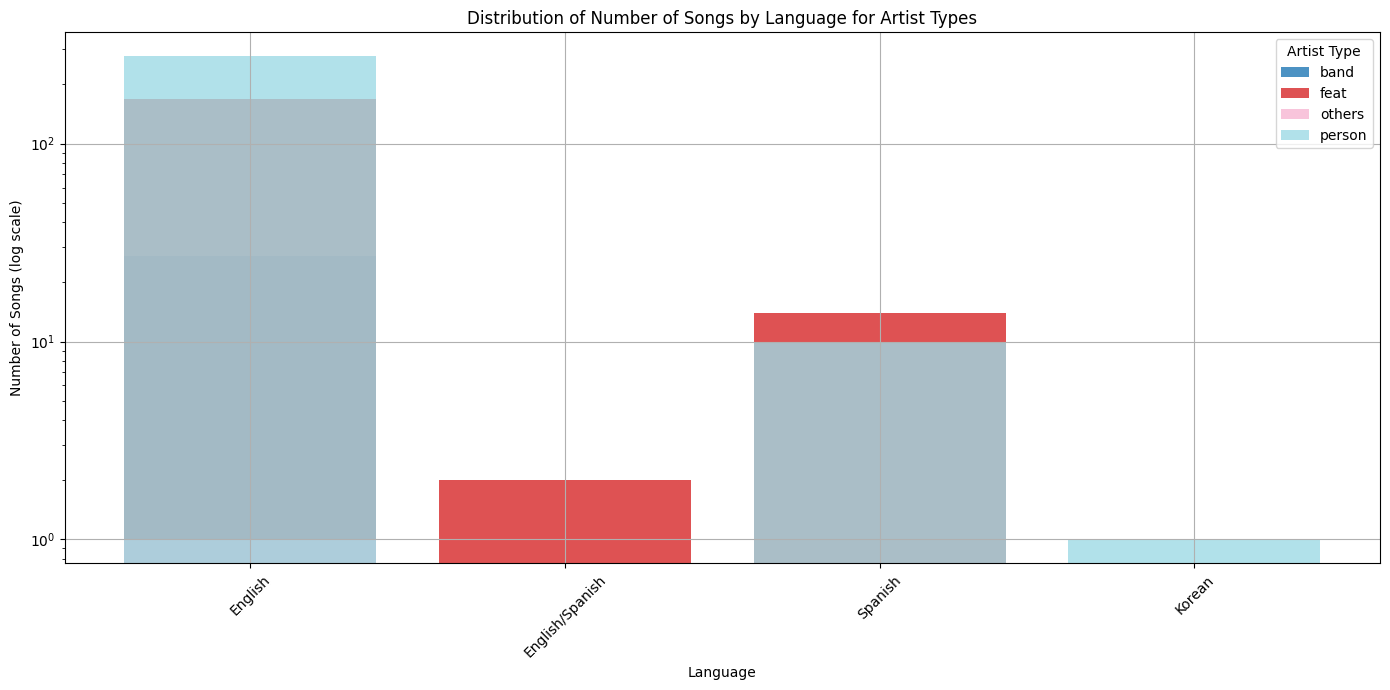

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data from the CSV file
data_file_path = '/content/data.csv'  # Path to your CSV file
song_lyrics = pd.read_csv(data_file_path)

# Check if the required columns exist
required_columns = ['artist_type', 'Language']
for column in required_columns:
    if column not in song_lyrics.columns:
        raise ValueError(f"The column '{column}' is required.")

# Group by artist type and language, then count the number of songs
language_counts = song_lyrics.groupby(['artist_type', 'Language']).size().reset_index(name='n_songs')

# Check if there are any counts for 'Group' or 'Band'
print(language_counts)  # Debugging output to see counts for each artist type

# Set a colorful palette using tab20
colors = plt.get_cmap('tab20', language_counts['artist_type'].nunique())

# Plotting the distribution
plt.figure(figsize=(14, 7))

# Create a list of languages to ensure all are displayed
all_languages = language_counts['Language'].unique()

# Separate the data for each artist type
for idx, artist_type in enumerate(language_counts['artist_type'].unique()):
    # Get the counts for the current artist type, filling missing languages with 0
    counts = language_counts[language_counts['artist_type'] == artist_type].set_index('Language')['n_songs']
    counts = counts.reindex(all_languages, fill_value=0)  # Ensure all languages are represented

    plt.bar(counts.index, counts.values, label=artist_type, color=colors(idx), alpha=0.8)  # More opaque bars

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Language')
plt.ylabel('Number of Songs (log scale)')
plt.title('Distribution of Number of Songs by Language for Artist Types')
plt.legend(title='Artist Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layou
